In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data_frame = pd.read_csv("CreditScoring.csv")
display(data_frame)

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,2,1,1,60,39,2,1,1,69,92,0,0,900,1020
4451,1,22,2,60,46,2,1,1,60,75,3000,600,950,1263
4452,2,0,2,24,37,2,1,2,60,90,3500,0,500,963
4453,1,0,1,48,23,1,1,3,49,140,0,0,550,550


In [4]:
data_frame.columns = data_frame.columns.str.lower()

In [5]:
status_vals = {
    1: "ok", 
    2: "default", 
    0: "unk"}

data_frame.status = data_frame.status.map(status_vals)

home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

data_frame.home = data_frame.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

data_frame.marital = data_frame.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

data_frame.records = data_frame.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

data_frame.job = data_frame.job.map(job_values)


In [6]:
display(data_frame)

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,default,1,rent,60,39,married,no,fixed,69,92,0,0,900,1020
4451,ok,22,owner,60,46,married,no,fixed,60,75,3000,600,950,1263
4452,default,0,owner,24,37,married,no,partime,60,90,3500,0,500,963
4453,ok,0,rent,48,23,single,no,freelance,49,140,0,0,550,550


In [7]:
data_frame.describe()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.000000,4455.000000,4455.000000,4455.000000,4.455000e+03,4.455000e+03,4.455000e+03,4455.000000,4455.000000
mean,7.987205,46.441751,37.077666,55.568799,7.633170e+05,1.060341e+06,4.043820e+05,1039.021773,1462.875645
std,8.173444,14.655225,10.984856,19.515878,8.703625e+06,1.021757e+07,6.344253e+06,474.543007,628.089913
min,0.000000,6.000000,18.000000,35.000000,0.000000e+00,0.000000e+00,0.000000e+00,100.000000,105.000000
25%,2.000000,36.000000,28.000000,35.000000,8.000000e+01,0.000000e+00,0.000000e+00,700.000000,1117.500000
50%,5.000000,48.000000,36.000000,51.000000,1.200000e+02,3.500000e+03,0.000000e+00,1000.000000,1400.000000
75%,12.000000,60.000000,45.000000,72.000000,1.660000e+02,6.000000e+03,0.000000e+00,1300.000000,1692.000000
max,48.000000,72.000000,68.000000,180.000000,1.000000e+08,1.000000e+08,1.000000e+08,5000.000000,11140.000000


In [51]:
data_frame.income = data_frame.income.replace(99999999.0, np.nan)

In [52]:
data_frame.assets = data_frame.assets.replace(99999999.0, np.nan)
data_frame.debt = data_frame.debt.replace(99999999.0, np.nan)

In [54]:
data_frame.describe()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.000000,4455.000000,4455.000000,4455.000000,4421.000000,4408.000000,4437.000000,4455.000000,4455.000000
mean,7.987205,46.441751,37.077666,55.568799,130.568197,5403.433984,342.948614,1039.021773,1462.875645
std,8.173444,14.655225,10.984856,19.515878,86.367434,11573.161523,1245.861736,474.543007,628.089913
min,0.000000,6.000000,18.000000,35.000000,0.000000,0.000000,0.000000,100.000000,105.000000
25%,2.000000,36.000000,28.000000,35.000000,80.000000,0.000000,0.000000,700.000000,1117.500000
50%,5.000000,48.000000,36.000000,51.000000,120.000000,3000.000000,0.000000,1000.000000,1400.000000
75%,12.000000,60.000000,45.000000,72.000000,165.000000,6000.000000,0.000000,1300.000000,1692.000000
max,48.000000,72.000000,68.000000,180.000000,959.000000,300000.000000,30000.000000,5000.000000,11140.000000


In [8]:
data_frame = data_frame[data_frame["status"] != "unk"]

In [9]:
data_frame.status.value_counts()

status
ok         3200
default    1254
Name: count, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(data_frame, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.2, random_state=42)

In [11]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [12]:
print(df_train.shape)
print(df_val.shape)
print(df_test.shape)

(2850, 14)
(713, 14)
(891, 14)


In [13]:
y_train = (df_train.status == "default").astype(int).values
y_val = (df_val.status == "default").astype(int).values
y_test = (df_test.status == "default").astype(int).values

In [14]:
del df_train["status"]
del df_val["status"]
del df_test["status"]

In [15]:
display(df_train)

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,2,owner,36,53,married,no,freelance,35,71,5000,0,800,1615
1,14,owner,60,28,married,no,fixed,45,178,4000,700,600,700
2,4,parents,36,27,married,no,fixed,45,72,0,0,350,1426
3,48,owner,36,62,married,no,freelance,60,0,25000,0,180,350
4,16,owner,60,32,married,no,fixed,60,159,4000,0,1500,1736
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845,6,owner,48,26,married,yes,fixed,35,90,5000,0,1390,1594
2846,5,owner,60,48,married,yes,fixed,90,100,2000,792,1000,1034
2847,28,owner,36,46,married,no,fixed,75,170,6000,0,750,800
2848,5,owner,36,27,married,no,freelance,45,0,0,0,1000,1622


Decision Trees

In [16]:
def assess_risk(client):
    if client["records"] == "yes":
        if client["job"] == "partime":
            return "default"
        else:
            return "ok"
    else:
        if client["assets"] > 6000:
            return "ok"
        else:
            return "default"

In [17]:
xi = df_train.iloc[0].to_dict()
print(xi)
assess_risk(xi)

{'seniority': 2, 'home': 'owner', 'time': 36, 'age': 53, 'marital': 'married', 'records': 'no', 'job': 'freelance', 'expenses': 35, 'income': 71, 'assets': 5000, 'debt': 0, 'amount': 800, 'price': 1615}


'default'

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer # because of categorical
from sklearn.metrics import roc_auc_score

In [20]:
train_dicts = df_train.to_dict(orient="records")
display(train_dicts[:5])

[{'seniority': 2,
  'home': 'owner',
  'time': 36,
  'age': 53,
  'marital': 'married',
  'records': 'no',
  'job': 'freelance',
  'expenses': 35,
  'income': 71,
  'assets': 5000,
  'debt': 0,
  'amount': 800,
  'price': 1615},
 {'seniority': 14,
  'home': 'owner',
  'time': 60,
  'age': 28,
  'marital': 'married',
  'records': 'no',
  'job': 'fixed',
  'expenses': 45,
  'income': 178,
  'assets': 4000,
  'debt': 700,
  'amount': 600,
  'price': 700},
 {'seniority': 4,
  'home': 'parents',
  'time': 36,
  'age': 27,
  'marital': 'married',
  'records': 'no',
  'job': 'fixed',
  'expenses': 45,
  'income': 72,
  'assets': 0,
  'debt': 0,
  'amount': 350,
  'price': 1426},
 {'seniority': 48,
  'home': 'owner',
  'time': 36,
  'age': 62,
  'marital': 'married',
  'records': 'no',
  'job': 'freelance',
  'expenses': 60,
  'income': 0,
  'assets': 25000,
  'debt': 0,
  'amount': 180,
  'price': 350},
 {'seniority': 16,
  'home': 'owner',
  'time': 60,
  'age': 32,
  'marital': 'married',
 

In [21]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
display(X_train)

array([[5.3e+01, 8.0e+02, 5.0e+03, ..., 0.0e+00, 2.0e+00, 3.6e+01],
       [2.8e+01, 6.0e+02, 4.0e+03, ..., 0.0e+00, 1.4e+01, 6.0e+01],
       [2.7e+01, 3.5e+02, 0.0e+00, ..., 0.0e+00, 4.0e+00, 3.6e+01],
       ...,
       [4.6e+01, 7.5e+02, 6.0e+03, ..., 0.0e+00, 2.8e+01, 3.6e+01],
       [2.7e+01, 1.0e+03, 0.0e+00, ..., 0.0e+00, 5.0e+00, 3.6e+01],
       [4.2e+01, 1.3e+03, 0.0e+00, ..., 0.0e+00, 0.0e+00, 4.8e+01]])

In [67]:
dt = DecisionTreeClassifier(random_state=42, criterion="log_loss", max_depth=2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=2, random_state=42)

In [68]:
val_dicts = df_val.to_dict(orient="records")
X_val = dv.transform(val_dicts)

In [69]:
y_pred = dt.predict_proba(X_val)[:, 1]

In [70]:
val_score = roc_auc_score(y_val, y_pred)
print(val_score)
y_pred = dt.predict_proba(X_train)[:, 1]
train_score  = roc_auc_score(y_train, y_pred)
print(train_score)

0.7055168840310502
0.7190321258977667


In [73]:
from sklearn.tree import export_text

print(export_text(dt, feature_names=dv.feature_names_))

|--- seniority <= 2.50
|   |--- records=yes <= 0.50
|   |   |--- class: 0
|   |--- records=yes >  0.50
|   |   |--- class: 1
|--- seniority >  2.50
|   |--- records=yes <= 0.50
|   |   |--- class: 0
|   |--- records=yes >  0.50
|   |   |--- class: 0



Decision Tree Learning Algorithm

In [77]:
data = [
    [8000, 3000, "default"],
    [2000, 1000, "default"],
    [0, 1000, "default"],
    [5000, 1000, "ok"],
    [5000, 1000, "ok"],
    [4000, 1000, "ok"],
    [9000, 500, "ok"],
    [3000, 2000, "default"]
] # First column is assets, second is debt, third is status

df_example = pd.DataFrame(data, columns=["assets", "debt", "status"])
df_example

,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


In [80]:
thresholds = {
    "assets": [2000, 3000, 4000, 5000, 8000],
    "debt": [500, 1000, 2000]
}


for feature, ts in thresholds.items():
    print("##########################")
    print(feature)
    for t in ts:
        print(t)
        df_left = df_example[df_example[feature] <= t]
        df_right = df_example[df_example[feature] > t]
        display(df_left)
        print(df_left.value_counts(normalize=True))
        display(df_right)
        print(df_right.status.value_counts(normalize=True))

        print()

##########################
assets
2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default


assets  debt  status 
0       1000  default    0.5
2000    1000  default    0.5
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64

3000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
7,3000,2000,default


assets  debt  status 
0       1000  default    0.333333
2000    1000  default    0.333333
3000    2000  default    0.333333
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64

4000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
5,4000,1000,ok
7,3000,2000,default


assets  debt  status 
0       1000  default    0.25
2000    1000  default    0.25
3000    2000  default    0.25
4000    1000  ok         0.25
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
6,9000,500,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64

5000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


assets  debt  status 
5000    1000  ok         0.333333
0       1000  default    0.166667
2000    1000  default    0.166667
3000    2000  default    0.166667
4000    1000  ok         0.166667
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
6,9000,500,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64

8000


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


assets  debt  status 
5000    1000  ok         0.285714
0       1000  default    0.142857
2000    1000  default    0.142857
3000    2000  default    0.142857
4000    1000  ok         0.142857
8000    3000  default    0.142857
Name: proportion, dtype: float64


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64

##########################
debt
500


,assets,debt,status
6,9000,500,ok


assets  debt  status
9000    500   ok        1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64

1000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


assets  debt  status 
5000    1000  ok         0.333333
0       1000  default    0.166667
2000    1000  default    0.166667
4000    1000  ok         0.166667
9000    500   ok         0.166667
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


assets  debt  status 
5000    1000  ok         0.285714
0       1000  default    0.142857
2000    1000  default    0.142857
3000    2000  default    0.142857
4000    1000  ok         0.142857
9000    500   ok         0.142857
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default


status
default    1.0
Name: proportion, dtype: float64



Decision Trees Parameter Tuning

In [81]:
for d in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)

    print("%4s -> %.3f" % (d, auc))

   1 -> 0.634
   2 -> 0.706
   3 -> 0.748
   4 -> 0.748
   5 -> 0.751
   6 -> 0.742
  10 -> 0.667
  15 -> 0.649
  20 -> 0.646
None -> 0.644


In [84]:
for d in [4, 5, 6]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        print("(%4s, %3d) -> %.3f" % (d, s, auc))

(   4,   1) -> 0.748
(   4,   2) -> 0.748
(   4,   5) -> 0.748
(   4,  10) -> 0.748
(   4,  15) -> 0.752
(   4,  20) -> 0.746
(   4, 100) -> 0.746
(   4, 200) -> 0.741
(   4, 500) -> 0.686
(   5,   1) -> 0.756
(   5,   2) -> 0.756
(   5,   5) -> 0.758
(   5,  10) -> 0.753
(   5,  15) -> 0.760
(   5,  20) -> 0.755
(   5, 100) -> 0.755
(   5, 200) -> 0.746
(   5, 500) -> 0.686
(   6,   1) -> 0.738
(   6,   2) -> 0.736
(   6,   5) -> 0.743
(   6,  10) -> 0.739
(   6,  15) -> 0.752
(   6,  20) -> 0.750
(   6, 100) -> 0.755
(   6, 200) -> 0.748
(   6, 500) -> 0.686


Ensemble Learning and Random Forest

In [96]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=18, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=18, random_state=42)

In [97]:
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.792889545001271

In [98]:
scores = []
for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)

    scores.append((n, auc))

In [100]:
df_scores = pd.DataFrame(scores, columns=["n_estimators", "auc"])

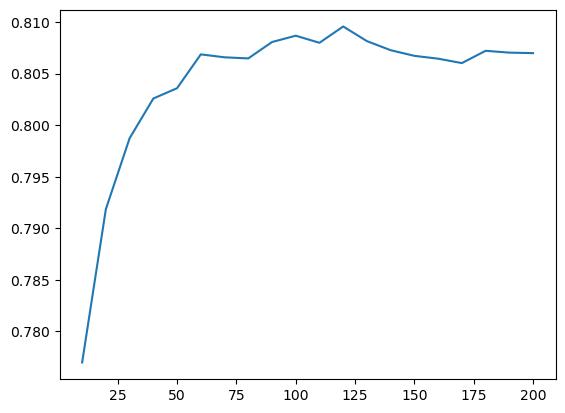

In [102]:
plt.plot(df_scores.n_estimators, df_scores.auc)
plt.show()

In [103]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=42)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

In [104]:
df_scores = pd.DataFrame(scores, columns=["max_depth", "n_estimators", "auc"])

In [105]:
display(df_scores)

,max_depth,n_estimators,auc
0,5,10,0.786579
1,5,20,0.800334
2,5,30,0.801664
3,5,40,0.803727
4,5,50,0.806322
5,5,60,0.804230
6,5,70,0.805883
7,5,80,0.806371
8,5,90,0.805746
9,5,100,0.804504


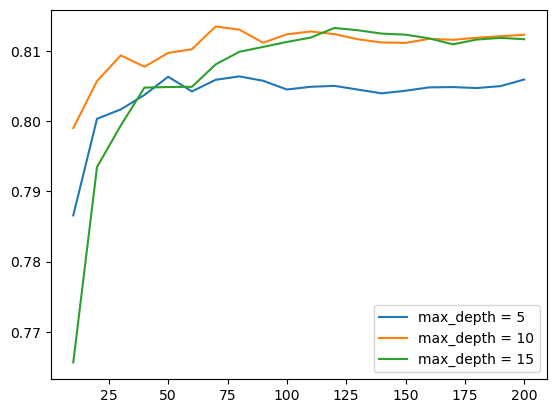

In [111]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.auc, label='max_depth = %d' %d)
    plt.legend()


In [112]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, 
                                    max_depth=10, 
                                    min_samples_leaf=s,
                                    random_state=42)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

In [121]:
df_scores = pd.DataFrame(scores, columns=["min_samples_leaf", "n_estimators", "auc"])
display(df_scores)

,min_samples_leaf,n_estimators,auc
0,1,10,0.799019
1,1,20,0.805702
2,1,30,0.809358
3,1,40,0.807745
4,1,50,0.809710
...,...,...,...
95,50,160,0.808840
96,50,170,0.808644
97,50,180,0.808263
98,50,190,0.808801


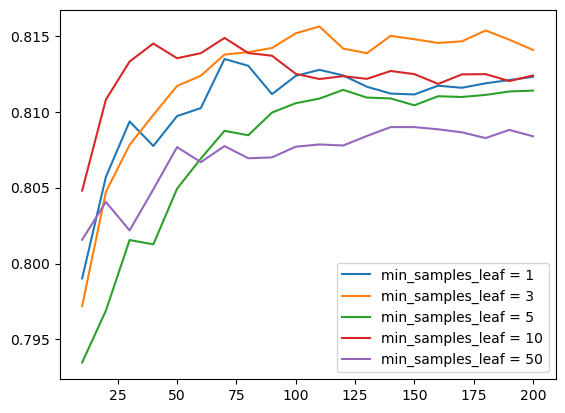

In [125]:
for s in [1, 3, 5, 10, 50]:
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    plt.plot(df_subset.n_estimators, df_subset.auc, label='min_samples_leaf = %d' %s)
    
plt.legend()


In [127]:
rf = RandomForestClassifier(n_estimators=n, 
                                    max_depth=10, 
                                    min_samples_leaf=3,
                                    random_state=42)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=42)

In [130]:
y_pred = rf.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)

In [131]:
print(auc)

0.8140703517587939


Gradient Boosting and XGBoost